# Simple Classification Project (Using Python Docs & Scikit-Learn)

---

## ✅ Step 1: Import Required Libraries

We'll use:
- `make_classification` to create data
- `train_test_split` to split data
- `LogisticRegression` to train a model
- `classification_report` to evaluate it
- `matplotlib` to visualize data


#  Confirming the same version as our Conda environment.

In [1]:
!python --version

Python 3.11.11


# Link to make_classification documentation:

🔗 https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

from sklearn.datasets import make_classification

| 📦 Part               | 🔍 Meaning                                                         |
| --------------------- | ------------------------------------------------------------------ |
| `sklearn`             | Package (Scikit-learn)                                             |
| `datasets`            | Module inside `sklearn`                                            |
| `make_classification` | Function (not method) that generates synthetic classification data |
| `X, y = ...`          | Returns two objects: `X` (features), `y` (labels)                  |


# terminal code:

conda create --name scikit_learn python=3.11

conda activate scikit_learn

pip install scikit-learn #  downloads and installs the library

##### For a Simple (Kitchen Analogy):

| 🧩 Term        | Meaning                              |
| -------------- | ------------------------------------ |
| `scikit-learn` | The **package name** used with `pip` |
| `sklearn`      | The **module name** used in `import` |

| 🔧 Concept                 | 🍳 Kitchen Analogy                                       |
| -------------------------- | -------------------------------------------------------- |
| `pip install scikit-learn` | 🛒 Go to the store and bring the ingredients (library)   |
| `import sklearn`           | 🍳 Unpack the ingredients from the bag to use in cooking |


pip install = bring tools or ingredients into VS Code (which was empty)

import sklearn = now you're ready to use those ingredients in your recipe (code)
##### For Technical Understanding:

| 🧩 Term        | Meaning                                                           |
| -------------- | ----------------------------------------------------------------- |
| `scikit-learn` | The name of the library on [PyPI](https://pypi.org) used by `pip` |
| `sklearn`      | The internal Python **module name** you use in `import`           |



# Step 1: creating dat a in the form of ndarrays:

These arrays do not have column names. They're just raw numbers.



In [9]:
#  This lets us use make_classification() to generate fake (but realistic) data for ML.
from sklearn.datasets import make_classification

# Official Docs Say:it will Return:

# X: ndarray of shape (n_samples, n_features): A 2D array (like a table) of features → input data
# X is a feature data → shape: (100, 5)

# y: ndarray of shape (n_samples,): A 1D array of target labels (0 or 1) → output class
# y is a label/target → shape: (100,)

See for arguments of X adn y here:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [8]:
X, y = make_classification(
    n_samples=100,         # 100 rows (examples)
    n_features=5,          # 5 features (columns)
    n_informative=3,       # 3 features useful for classification
    n_redundant=1,         # 1 redundant (linear combination)
    n_classes=2,           # binary classification (0 or 1)
    random_state=42        # reproducible results
)

In [ ]:
print(X[:2])

#print(X[:2]) means show the first two rows of the dataset stored in the NumPy array X.

[[ 0.06561344 -1.81431652 -0.84853401  0.27872303 -1.89816218]
 [ 1.9436449  -0.7812514  -0.78040602 -1.02038325 -0.17664666]]


In [13]:
print(X.shape)
print(y.shape)

(100, 5)
(100,)


# What does X.shape[1] mean?
| Code         | Meaning                        |
| ------------ | ------------------------------ |
| `X.shape[0]` | Number of rows (100 samples)   |
| `X.shape[1]` | Number of columns (5 features) |

Every NumPy array has a .shape attribute, which tells us its size as a tuple:(rows, columns)=  (100, 5).



In [20]:
X.shape[1]

5

In [17]:
list(y[:5])

# np.int64 is a class

[np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0)]

| Part          | Is it a...    | Meaning                                            |
| ------------- | ------------- | -------------------------------------------------- |
| `np`          | Module        | NumPy library (imported as `np`)                   |
| `np.int64`    | ✅ Class       | NumPy’s class for 64-bit integers                  |
| `np.int64(1)` | ✅ Object      | An instance of the `np.int64` class with value `1` |
| `x`           | ✅ Variable    | Stores the object `np.int64(1)`                    |
| `1`           | Value / Input | The actual number stored in the object             |

np.int64 = blueprint (class)

np.int64(1) = real car made from that blueprint (object)

x = np.int64(1) = naming the car "x"

#   Step 2: Convert X and y to a DataFrame

#### Documents:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

NumPy arrays (X, y) are harder to explore

Pandas DataFrames make it easier to view, describe, and plot the data

| Format           | Simple Analogy                      | Why It Matters                          |
| ---------------- | ----------------------------------- | --------------------------------------- |
| NumPy Array      | Raw ingredients in bags             | Hard to tell what each one is           |
| Pandas DataFrame | Ingredients neatly labeled in bowls | Easy to see, label, and mix for cooking |


### What It Means in Python:

| Task                | NumPy Array (`X`)    | Pandas DataFrame (`df`)               |
| ------------------- | -------------------- | ------------------------------------- |
| See column names    | ❌ No column names    | ✅ Clear column names like `Feature_1` |
| Preview rows easily | ❌ Uses array slices  | ✅ Use `df.head()`                     |
| Describe stats      | ❌ Need manual code   | ✅ Use `df.describe()` in 1 line       |
| Plot easily         | ⚠️ More setup needed | ✅ Built-in `.plot()` works instantly  |


Pandas = A smart table for Python

It helps us explore, clean, and analyze our data easily.



# Terminal code: 
pip install pandas

In [19]:
# This imports the Pandas library into your notebook and gives it a short name: pd.
import pandas as pd

In [21]:
df = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])


| Argument in Docs | our Code Value                                   | Meaning (Beginner)                                                          |
| ---------------- | ----------------------------------------------- | -------------------------------------------------------------------------- |
| `data`           | `X`                                             | The actual raw data (100 rows × 5 columns NumPy array)                     |
| `index`          | *not given* → defaults to `0, 1, 2, ..., 99`    | Auto-generated row numbers                                                 |
| `columns`        | `[f"Feature_{i+1}" for i in range(X.shape[1])]` | A list: `['Feature_1', 'Feature_2', ..., 'Feature_5']` → adds column names |
| `dtype`          | *not given*                                     | Pandas automatically guesses data types (e.g., float64)                    |
| `copy`           | *not given*                                     | Uses the original data directly (no deep copy unless needed)               |



| Part         | Meaning                                         |
| ------------ | ----------------------------------------------- |
| `f"..."`     | Tells Python to **evaluate inside braces `{}`** |
| `"Feature_"` | A fixed string (the prefix)                     |
| `{i+1}`      | Inserts the value of `i+1` dynamically          |


[f"Feature_{i+1}" for i in range(X.shape[1])]:
List Comprehension?
A shortcut way to create a list in one line, using a loop inside square brackets.


| Part                | Meaning                                        |
| ------------------- | ---------------------------------------------- |
| `range(X.shape[1])` | Gives column indices: `[0, 1, 2, 3, 4]`        |
| `f"Feature_{i+1}"`  | Makes strings: `'Feature_1', ..., 'Feature_5'` |
| Entire expression   | Creates a list of column names                 |


In [22]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,0.065613,-1.814317,-0.848534,0.278723,-1.898162
1,1.943645,-0.781251,-0.780406,-1.020383,-0.176647
2,2.215437,-1.591460,-1.754176,-0.157724,0.875586
3,2.248896,1.438831,1.071276,0.166088,-0.733065
4,1.398888,1.603281,1.307294,-2.452265,-0.763596


#  Add the Target Column (Labels)

In [23]:
df["Target"] = y
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,0.065613,-1.814317,-0.848534,0.278723,-1.898162,0
1,1.943645,-0.781251,-0.780406,-1.020383,-0.176647,1
2,2.215437,-1.591460,-1.754176,-0.157724,0.875586,1
3,2.248896,1.438831,1.071276,0.166088,-0.733065,1
4,1.398888,1.603281,1.307294,-2.452265,-0.763596,0


| Parameter     | What It Controls                        |
| ------------- | --------------------------------------- |
| `n_classes=2` | Generates 2 types of labels → 0 and 1   |
| `y` Output    | Will be like: `[1, 0, 0, 1, 1, 0, ...]` |


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  100 non-null    float64
 1   Feature_2  100 non-null    float64
 2   Feature_3  100 non-null    float64
 3   Feature_4  100 non-null    float64
 4   Feature_5  100 non-null    float64
 5   Target     100 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


In [25]:
df.isnull().sum()

Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
Target       0
dtype: int64

In [28]:
df.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Target'],
      dtype='object')

# Train a Simple Classifier

Let’s use Logistic Regression to classify the data.

Doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [26]:
from sklearn.linear_model import LogisticRegression

| Part                 | Type    | Meaning                                                     |
| -------------------- | ------- | ----------------------------------------------------------- |
| `sklearn`            | Package | The main Scikit-learn library                               |
| `linear_model`       | Module  | A submodule with linear models (regression, classification) |
| `LogisticRegression` | Class   | A class that builds logistic regression models              |


# Split the Data

link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#### general syntax: 
sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

### None: 
When a parameter is shown as =None, it means:If you don’t provide it, Python uses a default internal rule or behavior.

#### What is None in Python?

| Term   | Meaning                                                  |
| ------ | -------------------------------------------------------- |
| `None` | A special value meaning “nothing”, “empty”, or “not set” |

####  Example:

train_test_split(X, y)  # No test_size → uses default

Python will:

use default test_size=0.25

automatically compute train_size=0.75

| When You See...  | It Means...                                    |
| ---------------- | ---------------------------------------------- |
| `test_size=None` | Optional — Python will handle it if omitted    |
| `dtype=None`     | Optional — Pandas guesses data type            |
| `columns=None`   | Optional — Column names will be auto-generated |




In [33]:
from sklearn.model_selection import train_test_split 
# Hey Python, from the scikit-learn package, go into the model_selection module, and give me the function train_test_split.

| 🔹 Part            | 🔍 Type  | ✅ Meaning (Beginner-Friendly)                          |
| ------------------ | -------- | ------------------------------------------------------ |
| `sklearn`          | Package  | Main machine learning library (scikit-learn)           |
| `model_selection`  | Module   | A submodule for splitting data, cross-validation, etc. |
| `train_test_split` | Function | Splits our dataset into training and testing sets     |


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model

Link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

| Code                                  | What It Does                     |
| ------------------------------------- | -------------------------------- |
| `model = LogisticRegression()`        | Create model (step 1)            |
| `model.fit(X_train, y_train)`         | Train model (step 2)             |
| `model = LogisticRegression(...).fit()` | Create + train + assign (1-line) |


In [35]:
model = LogisticRegression(random_state=0)

#  Fit the model

In [36]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

#  Predict Test Labels

| Code                 | Meaning                             |
| -------------------- | ----------------------------------- |
| `X_test`             | Unseen features (20% test set)      |
| `model.predict(...)` | Uses the trained model to guess `y` |
| `y_pred`             | Predicted labels (0 or 1)           |


In [38]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0]


# Interpretations:

test_size=0.2

So 20% of 100 = 20 test samples

✅ That’s why y_pred has 20 predictions.

Some samples are class 0 (e.g., 1st, 3rd, 8th, 10th)

Most are class 1.

| Value | Meaning                |
| ----- | ---------------------- |
| `0`   | Belongs to **class 0** |
| `1`   | Belongs to **class 1** |

| `0` Label  | `1` Label   |
| ---------- | ----------- |
| Not Spam   | Spam        |
| No Disease | Has Disease |
| Negative   | Positive    |

I created synthetic data, so the actual meaning of 0 and 1 is not tied to real labels — but in real projects, you assign the meaning.



# Check Accuracy

Link  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

| Function                | Purpose                                 |
| ----------------------- | --------------------------------------- |
| `accuracy_score`        | Compares `y_test` vs `y_pred`           |
| `print("Accuracy:", …)` | Shows how many were predicted correctly |


In [39]:
from sklearn.metrics import accuracy_score

| 🔹 Part          | Type     | Meaning                                      |
| ---------------- | -------- | -------------------------------------------- |
| `sklearn`        | Package  | The scikit-learn library                     |
| `metrics`        | Module   | Evaluation tools (accuracy, precision, etc.) |
| `accuracy_score` | Function | Computes how many predictions are correct    |


In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8


# Interpretation:

| 🔹 Parameter     | Role                                                         |
| ---------------- | ------------------------------------------------------------ |
| `y_test`         | True labels (actual values)                                  |
| `y_pred`         | Predicted labels from your model                             |
| `accuracy_score` | Returns value between `0` and `1` (e.g., 0.80 = 80% correct) |

What it mean:

Out of all the predictions our model made, 80% were correct.

Since our test set had 20 samples:

✅ Model got 16 correct.

❌ Model got 4 wrong.


# Confusion Matrix

Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

| Part               | Type     | Meaning                           |
| ------------------ | -------- | --------------------------------- |
| `sklearn.metrics`  | Module   | Evaluation tools (metrics)        |
| `confusion_matrix` | Function | Compares true vs predicted labels |


| Parameter | Meaning                           |
| --------- | --------------------------------- |
| `y_test`  | Actual labels                     |
| `y_pred`  | Model's predicted labels          |
| `cm`      | 2x2 matrix showing match/mismatch |


In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 5  3]
 [ 1 11]]


# Standard Confusion Matrix Format:

|              | Predicted 0 | Predicted 1 |
| ------------ | ----------- | ----------- |
| **Actual 0** | 5 (TN)      | 3 (FP)      |
| **Actual 1** | 1 (FN)      | 11 (TP)     |


| Abbreviation | Meaning                               |
| ------------ | ------------------------------------- |
| **TN**       | True Negative – correctly predicted 0 |
| **FP**       | False Positive – wrongly predicted 1  |
| **FN**       | False Negative – wrongly predicted 0  |
| **TP**       | True Positive – correctly predicted 1 |





Interpreatation:

| Term                    | Value | Meaning                                                                    |
| ----------------------- | ----- | -------------------------------------------------------------------------- |
| **True Negative (TN)**  | 5     | Model correctly predicted **class 0** when it was actually **class 0**     |
| **False Positive (FP)** | 3     | Model predicted **class 1**, but it was actually **class 0** (wrong alert) |
| **False Negative (FN)** | 1     | Model predicted **class 0**, but it was actually **class 1** (missed case) |
| **True Positive (TP)**  | 11    | Model correctly predicted **class 1** when it was actually **class 1**     |


# What does 5 (True Negative) mean?

That 5 is a count — not a percentage.

Out of 20 test samples, the model correctly predicted 5 times that the class was 0 when it actually was 0.

#  Precision:
Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

| Part              | Type     | What It Does                                                 |
| ----------------- | -------- | ------------------------------------------------------------ |
| `sklearn`         | Package  | Main scikit-learn library                                    |
| `metrics`         | Module   | Contains tools to evaluate model performance                 |
| `precision_score` | Function | Calculates **how precise** your model is when it predicts 1  |
| `recall_score`    | Function | Calculates **how many actual 1s** your model correctly found |



| Metric    | Simple Meaning                                                                                   |
| --------- | ------------------------------------------------------------------------------------------------ |
| Precision | Out of all predicted 1s, how many were actually 1? (How accurate are your positive predictions?) |
| Recall    | Out of all actual 1s, how many did the model find? (How well does it catch positives?)           |


#  Simple Rule (Beginner-Friendly): for zero (0) and (1):
| Class | Meaning      | Role in Evaluation                         |
| ----- | ------------ | ------------------------------------------ |
| `1`   | **Positive** | What you are trying to **detect or catch** |
| `0`   | **Negative** | Everything **else** (not the target class) |

| Dataset Example    | Class `1` (Positive) | Class `0` (Negative)   |
| ------------------ | -------------------- | ---------------------- |
| Spam detection     | Spam email           | Not spam (ham)         |
| Disease prediction | Has disease          | Healthy                |
| Loan default       | Defaulted loan       | Paid loan              |
| Fraud detection    | Fraud                | Legitimate transaction |

## precision/recall:

1 = positive class (default in scikit-learn)

Metrics are focused on how well our model handles class 1.

Positive (1) means the thing we care most about catching.

Everything else is Negative (0).




In [43]:
from sklearn.metrics import precision_score, recall_score

# All parameters of precision:


| Parameter       | Default Used Here | Meaning (Beginner-Friendly)                                           |
| --------------- | ----------------- | --------------------------------------------------------------------- |
| `labels`        | `None`            | Automatically uses unique labels from `y_true` (e.g., `[0, 1]`)       |
| `pos_label`     | `1`               | Treats `1` as the **positive class** (the one we care about catching) |
| `average`       | `'binary'`        | For binary classification — treats as one-vs-rest                     |
| `sample_weight` | `None`            | No weighting applied — treats all samples equally                     |
| `zero_division` | `'warn'`          | Warns if precision = 0 due to no predicted positives                  |


In [44]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.7857142857142857


# Interpretation:

Out of all predicted class 1 samples, 78.6% were actually class 1 (correct).


Our model predicted 14 samples as class 1:

✅ 11 were actually class 1 → True Positives (TP)

❌ 3 were actually class 0 → False Positives (FP)

This means:
Out of all the times the model said “this is class 1,” it was right about 78.6% of the time.


precision = TP / (TP + FP) = 11 / (11 + 3) = 11 / 14 ≈ 0.786


# Recall Formula:

recall = TP / (TP + FN)

Where:

TP (True Positives) = 11

FN (False Negatives) = 1


Recall Interpretation:
If your test set had 12 actual class 1 samples:

✅ The model correctly predicted 11 of them as class 1 → True Positives

❌ It missed 1 sample, wrongly predicting it as class 0 → False Negative

recall = 11 / (11 + 1) = 11 / 12 ≈ 0.917



Out of all the real class 1 samples, the model successfully found 91.7% of them.

# Precision vs Recall — Simple Comparison

| Metric        | What It Measures                                               | Easy Meaning                                 |
| ------------- | -------------------------------------------------------------- | ---------------------------------------------------- |
| **Precision** | Out of predicted **positives (1s)**, how many were **correct** | "When the model says 1, how often is it right?"      |
| **Recall**    | Out of **actual positives (1s)**, how many the model **found** | "How many real 1s did the model successfully catch?" |


# F1 Score:

The F1 Score is the harmonic mean of precision and recall — it balances both.

It Combines precision and recall into a single score.
It’s especially useful when you want a balance between the two.

Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html


In [45]:
from sklearn.metrics import f1_score

| 🔹 Part    | Type         | Meaning                       |
| ---------- | ------------ | -------------------------------------------------- |
| `sklearn`  | **Package**  | The main scikit-learn machine learning package     |
| `metrics`  | **Module**   | Contains tools for measuring model performance     |
| `f1_score` | **Function** | Calculates the harmonic mean of precision & recall |


In [46]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.8461538461538461


Simple Interpretation :

Our model has a balanced performance —it's about 84.6% good at both:

Correctly predicting class 1 (precision)

Finding actual class 1s (recall).

The F1 score says:VOverall, our model is doing a very good job of catching class 1s without too many false alarms.

# Final Evaluation Summary (Based on Results)

| Metric        | Value | Simple Interpretation                                          |
| ------------- | ----- | -------------------------------------------------------------- |
| **Accuracy**  | 0.85  | Model got **85%** of all test samples correct                  |
| **Precision** | 0.786 | When model predicted `1`, it was correct **78.6%** of the time |
| **Recall**    | 0.917 | Model found **91.7%** of all actual `1`s (positives)           |
| **F1 Score**  | 0.846 | Balanced score between precision & recall (**84.6%**)          |

Our model is doing very well overall. It catches most of the real class 1s, and usually predicts them correctly.


# Precision-Recall Curve and ROC curve.

### Link for ROC curve :
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

In [48]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#  Full Structure Breakdown:
| Code Part       | Type         | Meaning (Beginner-Friendly)                                 |
| --------------- | ------------ | ----------------------------------------------------------- |
| `sklearn`       | **Package**  | Main machine learning library (scikit-learn)                |
| `metrics`       | **Module**   | Submodule with model evaluation tools (e.g., accuracy, ROC) |
| `roc_curve`     | **Function** | Calculates FPR & TPR for various thresholds                 |
| `roc_auc_score` | **Function** | Calculates area under the ROC curve                         |
| `matplotlib`    | **Library**  | Python plotting library                                     |
| `pyplot`        | **Module**   | Interface for plotting (like MATLAB)                        |
| `plt`           | **Alias**    | Short name for `matplotlib.pyplot`                          |


# Parameters for ROC curve  & How to Get Them:

| Variable     | What It Is                             | How to Get It                                 |
| ------------ | -------------------------------------- | --------------------------------------------- |
| `y_test`     | True labels (0 or 1)                   | From your test split: `train_test_split(...)` |
| `y_proba`    | Predicted probabilities for class 1    | `model.predict_proba(X_test)[:, 1]`           |
| `fpr`        | False Positive Rate values             | Comes from `roc_curve(y_test, y_proba)`       |
| `tpr`        | True Positive Rate (recall) values     | Comes from `roc_curve(y_test, y_proba)`       |
| `thresholds` | Decision thresholds for classification | Comes from `roc_curve(y_test, y_proba)`       |
| `auc_score`  | Area under the ROC curve               | `roc_auc_score(y_test, y_proba)`              |


# Link of  predict_proba(X) for calculating ROC:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba

In [51]:
# Step 1: Get prediction probabilities for class 1
y_proba = model.predict_proba(X_test)[:, 1]

# model.predict_proba(X_test); Return isa NumPy array

# Shape: (n_samples, n_classes) → in our case: (20, 2)

# [:, 1]: It selects only the probabilities for class 1.

# : → all rows and 1 → column index for class 1

# This gives a 1D array of predicted probabilities for class 1 only — used in ROC curve.

# Link for ROC curve

 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

 # Link for roc_auc_score():

 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

#  Plot Predicted Probability Distribution (Histogram)

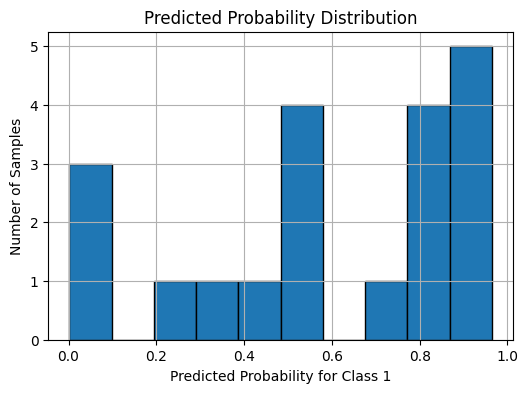

In [56]:
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
y_proba = model.predict_proba(X_test)[:, 1]

# Plot histogram
plt.figure(figsize=(6, 4))
plt.hist(y_proba, bins=10, edgecolor='black')
plt.title("Predicted Probability Distribution")
plt.xlabel("Predicted Probability for Class 1")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()

# Interpretation:
X-axis: Predicted probability that a sample belongs to Class 1

Y-axis: Number of samples with that predicted probability

| Observation                                      | Meaning                                                                         |
| ------------------------------------------------ | ------------------------------------------------------------------------------- |
| A cluster of bars near **0.9–1.0**               | The model is very confident that these samples are Class 1                      |
| Some bars near **0.0**                           | The model is very confident that these samples are NOT Class 1 (likely Class 0) |
| Sparse values in the **middle** (around 0.4–0.6) | The model rarely gives "uncertain" predictions — which is good for confidence!  |


#  Classification Report

In [57]:
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:")
print(classification_report(y_test, model.predict(X_test)))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.79      0.92      0.85        12

    accuracy                           0.80        20
   macro avg       0.81      0.77      0.78        20
weighted avg       0.80      0.80      0.79        20



In [52]:
# Step 2: Get ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

In [54]:
# Step 3: Get AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Official Documentation Links:

| Function or Feature             | Official Doc Link                                                                                                                                                                                                                        |
| ------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `plt.figure()`                  | [https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.figure.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)                                                                                     |
| `plt.plot()`                    | [https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.plot.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)                                                                                         |
| `plt.xlabel()` / `plt.ylabel()` | [https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.xlabel.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) / [ylabel](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) |
| `plt.title()`                   | [https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.title.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html)                                                                                       |
| `plt.legend()`                  | [https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.legend.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)                                                                                     |
| `plt.grid()`                    | [https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.grid.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html)                                                                                         |
| `plt.show()`                    | [https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.show.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html)                                                                                         |


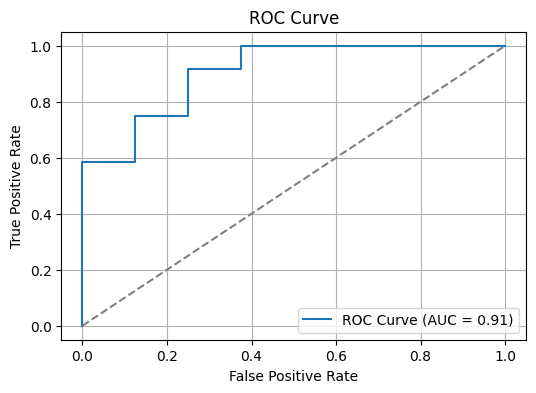

In [55]:
# Step 4: Plot the ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Interpretation of ROC Curve:

| Metric | Value | Meaning                                                      |
| ------ | ----- | ------------------------------------------------------------ |
| AUC    | 0.91  | Excellent ability to distinguish between Class 0 and Class 1 |


##  AUC Value Guide:

| AUC Range   | Meaning          |
| ----------- | ---------------- |
| 0.90 – 1.00 | Excellent        |
| 0.80 – 0.90 | Good             |
| 0.70 – 0.80 | Fair             |
| 0.50 – 0.70 | Poor to No Skill |
| 0.50        | Random Guessing  |


## Curve vs. Diagonal

| Curve Element  | Meaning                                                    |
| -------------- | ---------------------------------------------------------- |
| Blue Curve     | Your model’s performance (ROC curve)                       |
| Gray Diagonal  | Baseline for random guessing                               |
| Interpretation | Curve is well above diagonal → model is better than random |


##  TPR vs. FPR:

| Term                      | Description                                                           |
| ------------------------- | --------------------------------------------------------------------- |
| TPR (True Positive Rate)  | Also called sensitivity – how many positives are correctly identified |
| FPR (False Positive Rate) | 1 – specificity – how many false positives are made                   |
| Observation               | TPR = 1.0 is reached early with low FPR → very few false alarms       |

## Final conclusion:

| Summary     | Interpretation                                                  |
| ----------- | --------------------------------------------------------------- |
| Model skill | Very good at telling who is class 1 and who is not              |
| AUC = 0.91  | Model gets it right 91% of the time — much better than guessing |
